In [1]:
import pandas as pd
from scipy.stats import pointbiserialr
import plotly.express as px
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "data/voice.csv"
data = pd.read_csv(file_path)

data['label'] = data['label'].map({'male': 1, 'female': 0})


In [3]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [4]:
print(f"We have a total of {len(data)} observations")
print("The repartition between label 1 (male) and 0 (female) is a followed:")
data.groupby('label').size().reset_index(name='count')

We have a total of 3168 observations
The repartition between label 1 (male) and 0 (female) is a followed:


,label,count
0,0,1584
1,1,1584


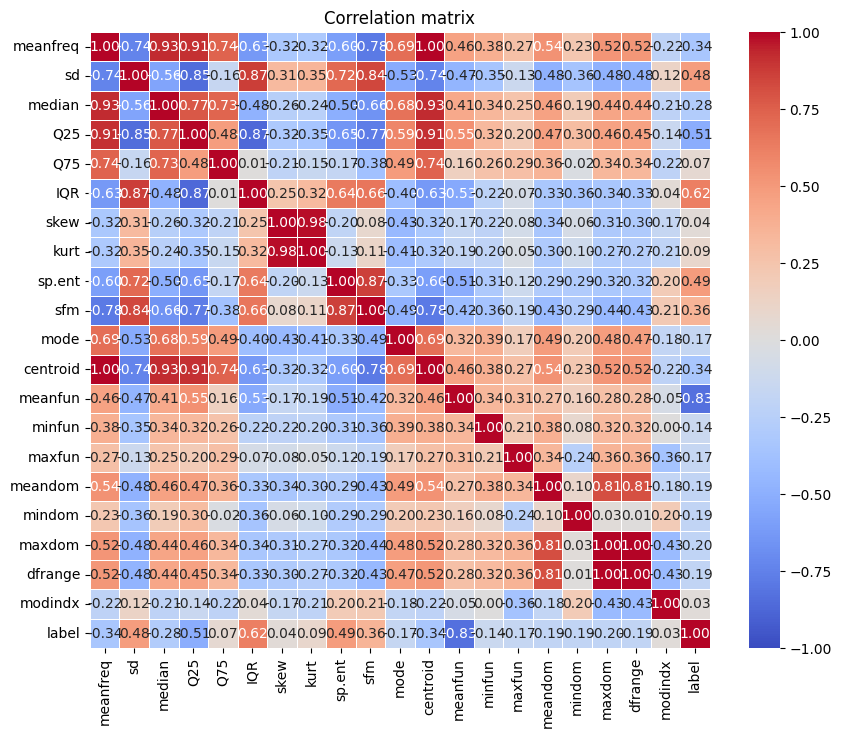

In [5]:
#correlation matrix between all the variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

In [6]:
#focus on the correlations with the variable of interest label
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

correlations = {}
for col in numerical_columns:
    if col != 'label':
        corr, p_value = pointbiserialr(data['label'], data[col])
        correlations[col] = {'correlation': corr, 'p_value': p_value}

correlation_df = pd.DataFrame(correlations).T
print(correlation_df)

          correlation        p_value
meanfreq    -0.337415   3.368951e-85
sd           0.479539  6.654756e-182
median      -0.283919   8.259210e-60
Q25         -0.511455  9.140832e-211
Q75          0.066906   1.642021e-04
IQR          0.618916   0.000000e+00
skew         0.036627   3.926293e-02
kurt         0.087195   8.869557e-07
sp.ent       0.490552  1.614016e-191
sfm          0.357499   3.877715e-96
mode        -0.171775   2.097044e-22
centroid    -0.337415   3.368951e-85
meanfun     -0.833921   0.000000e+00
minfun      -0.136692   1.101400e-14
maxfun      -0.166461   4.044625e-21
meandom     -0.191067   1.992966e-27
mindom      -0.194974   1.636130e-28
maxdom      -0.195657   1.050986e-28
dfrange     -0.192213   9.626061e-28
modindx      0.030801   8.303136e-02


In [7]:
# best features : interquantile range (IRQ), spectral entropy (sp.ent), spectral flatness (sfm)

In [8]:
fig = px.box(
    data,
    x="label",
    y="IQR",
    color="label",
    title="Boxplot de IQR par Label",
    labels={"label": "Label", "IQR": "IQR"},
    template="plotly_white"
)

fig.show()

In [9]:
ttest_ind(data.loc[data['label']==0]['IQR'], data.loc[data['label']==1]['IQR'], equal_var=False)
#The very small p-value of the t-test confirms that the means of IQR, for female and male, are statistically significantly different.

TtestResult(statistic=-44.33677930949558, pvalue=1.295877856305547e-309, df=2264.285095158045)

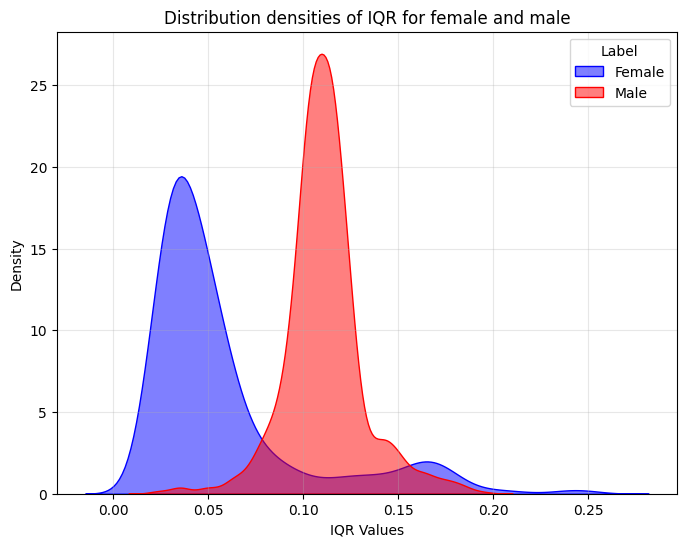

In [10]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=data.loc[data['label']==0], x='IQR', label='Female', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=data.loc[data['label']==1], x='IQR', label='Male', color='red', fill=True, alpha=0.5)

plt.xlabel('IQR Values')
plt.ylabel('Density')
plt.title('Distribution densities of IQR for female and male')
plt.legend(title='Label')
plt.grid(alpha=0.3)
plt.show()

In [11]:
fig = px.box(
    data,
    x="label",
    y="sfm",
    color="label",
    title="Boxplot de Spectral Flatness par Label",
    labels={"label": "Label", "SFM": "SFM"},
    template="plotly_white"
)

fig.show()

In [12]:
ttest_ind(data.loc[data['label']==0]['sfm'], data.loc[data['label']==1]['sfm'], equal_var=False)
#The very small p-value of the t-test confirms that the means of sfm, for female and male, are statistically significantly different.

TtestResult(statistic=-21.538876334045884, pvalue=6.03009563830997e-96, df=3070.3561810955703)

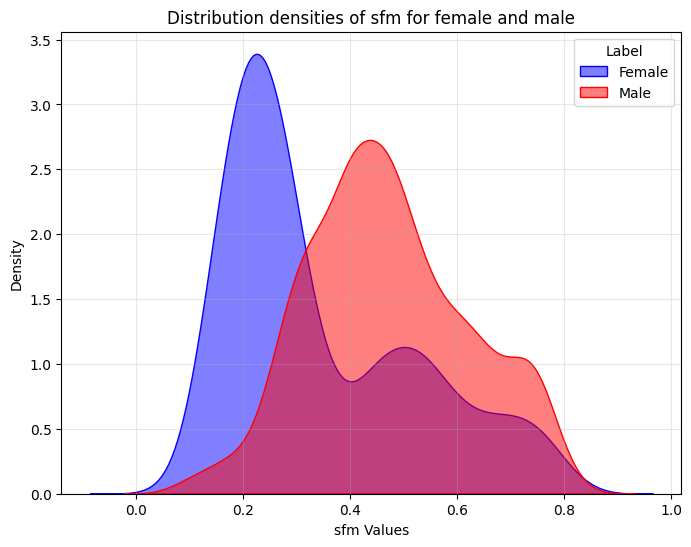

In [13]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=data.loc[data['label']==0], x='sfm', label='Female', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=data.loc[data['label']==1], x='sfm', label='Male', color='red', fill=True, alpha=0.5)

plt.xlabel('sfm Values')
plt.ylabel('Density')
plt.title('Distribution densities of sfm for female and male')
plt.legend(title='Label')
plt.grid(alpha=0.3)
plt.show()

In [14]:
fig = px.box(
    data,
    x="label",
    y="sp.ent",
    color="label",
    title="Boxplot de Spectral Entropy par Label",
    labels={"label": "Label", "Spectral entropy": "Spectral entropy"},
    template="plotly_white"
)

fig.show()

In [15]:
ttest_ind(data.loc[data['label']==0]['sp.ent'], data.loc[data['label']==1]['sp.ent'], equal_var=False)
#The very small p-value of the t-test confirms that the means of sp.ent, for female and male, are statistically significantly different.

TtestResult(statistic=-31.675048814367646, pvalue=9.749007393776314e-187, df=2622.8082984945463)

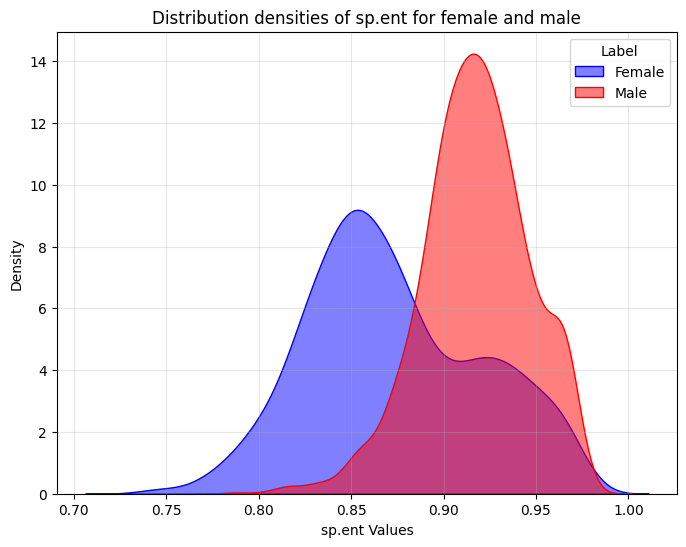

In [16]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=data.loc[data['label']==0], x='sp.ent', label='Female', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=data.loc[data['label']==1], x='sp.ent', label='Male', color='red', fill=True, alpha=0.5)

plt.xlabel('sp.ent Values')
plt.ylabel('Density')
plt.title('Distribution densities of sp.ent for female and male')
plt.legend(title='Label')
plt.grid(alpha=0.3)
plt.show()

In [17]:
fig = px.box(
    data,
    x="label",
    y="meanfun", #  average of fundamental frequency measured across acoustic signal
    color="label",
    title="Boxplot de meanfun par Label",
    labels={"label": "Label", "meanfun": "meanfun"},
    template="plotly_white"
)

fig.show()

In [18]:
ttest_ind(data.loc[data['label']==0]['meanfun'], data.loc[data['label']==1]['meanfun'], equal_var=False)
#The very small p-value of the t-test confirms that the means of IQR, for female and male, are statistically significantly different.

TtestResult(statistic=85.02229332337929, pvalue=0.0, df=3149.7541418065143)

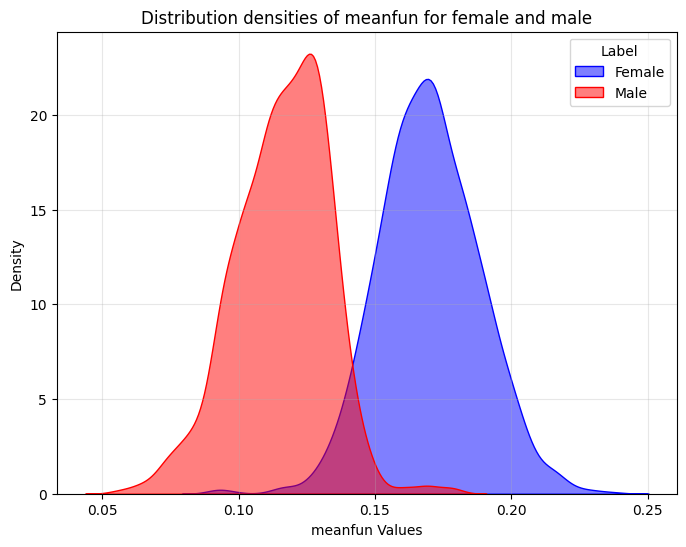

In [19]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=data.loc[data['label']==0], x='meanfun', label='Female', color='blue', fill=True, alpha=0.5)
sns.kdeplot(data=data.loc[data['label']==1], x='meanfun', label='Male', color='red', fill=True, alpha=0.5)

plt.xlabel('meanfun Values')
plt.ylabel('Density')
plt.title('Distribution densities of meanfun for female and male')
plt.legend(title='Label')
plt.grid(alpha=0.3)
plt.show()